In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### The diabetes dataset consists of 768 data points, with 9 features each

In [ ]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Outcome 0 means No diabetes, outcome 1 means diabetes
Of these 768 data points, 500 are labeled as 0 and 268 as 1:

In [ ]:
print(diabetes.groupby('Outcome').size())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


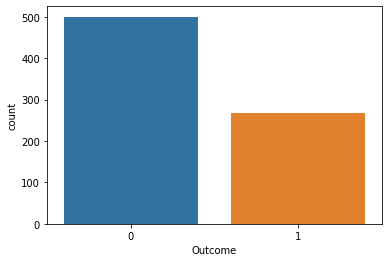

In [ ]:
import seaborn as sns

sns.countplot(diabetes['Outcome'],label="Count")

In [ ]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

In [ ]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


In [ ]:
X = diabetes_mod.iloc[:, :8]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y = diabetes_mod["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    
print(X_train.shape)

(579, 8)


In [ ]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
475            0      137             84             27        0  27.3   
6              3       78             50             32       88  31.0   
450            1       82             64             13       95  21.2   
635           13      104             72              0        0  31.2   
438            1       97             70             15        0  18.2   
..           ...      ...            ...            ...      ...   ...   
77             5       95             72             33        0  37.7   
114            7      160             54             32      175  30.5   
286            5      155             84             44      545  38.7   
463            5       88             78             30        0  27.6   
110            3      171             72             33      135  33.3   

     DiabetesPedigreeFunction  Age  
475                     0.231   59  
6                       0.248   26  


In [ ]:
print(y_train.shape)

(579,)


In [ ]:
print(y_train)

475    0
6      1
450    0
635    1
438    0
      ..
77     0
114    1
286    0
463    0
110    1
Name: Outcome, Length: 579, dtype: int64


In [ ]:
print(X_test.shape)


(145, 8)


In [ ]:
print(y_test.shape)

(145,)


In [ ]:
X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
475,0,137,84,27,0,27.3,0.231,59
6,3,78,50,32,88,31.0,0.248,26
450,1,82,64,13,95,21.2,0.415,23
635,13,104,72,0,0,31.2,0.465,38
438,1,97,70,15,0,18.2,0.147,21


The objective of a **Linear SVC** (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data.




SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale:


The **min-max scalar** form of normalization uses the mean and standard deviation to box all the data into a range lying between a certain min and max value. For most purposes, the range is set between 0 and 1.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.71


In [ ]:
X_train_scaled[:5, :]

array([[0.        , 0.6       , 0.6122449 , 0.27272727, 0.        ,
        0.18609407, 0.06532878, 0.63333333],
       [0.17647059, 0.21935484, 0.26530612, 0.32323232, 0.10401891,
        0.26175869, 0.07258753, 0.08333333],
       [0.05882353, 0.24516129, 0.40816327, 0.13131313, 0.11229314,
        0.06134969, 0.14389411, 0.03333333],
       [0.76470588, 0.38709677, 0.48979592, 0.        , 0.        ,
        0.26584867, 0.16524338, 0.28333333],
       [0.05882353, 0.34193548, 0.46938776, 0.15151515, 0.        ,
        0.        , 0.029462  , 0.        ]])



We should be able to know how to apply, tune, and analyze the models we practiced above.

Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

**C**

C is the penalty parameter of the error term. 

It controls the trade off between smooth decision boundary and classifying the training points correctly.

C is the penalty parameter, which represents misclassification or error term. 
The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example

C = [0.1, 1, 10, 100, 1000]


In [ ]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.769
Accuracy on test set: 0.766


**gamma**

gamma is a parameter for non linear hyperplanes. 

The higher the gamma value it tries to exactly fit the training data set

A lower value of Gamma will loosely fit the training dataset,

 whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting.


gammas = [0.1, 1, 10, 100] 

In [ ]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.1, C=C)
rbf_svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    rbf_svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(rbf_svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.772
Accuracy on test set: 0.779


In [ ]:
C = 1.0  # SVM regularization parameter
poly_svc = svm.SVC(kernel='poly', degree=2, C=C)
poly_svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    poly_svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(poly_svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.791
Accuracy on test set: 0.752


In [ ]:
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_train_scaled)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.768566493955095
poly
0.8065630397236615
rbf
0.7979274611398963
sigmoid
0.3696027633851468


In [ ]:
#Using the best model#
model = svm.SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
YHat = model.predict(X_test_scaled)
print (round(accuracy_score(y_test, YHat)*100,2))

71.03


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, YHat)

array([[77, 25],
       [17, 26]])

In [ ]:
print(classification_report(y_test, YHat))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       102
           1       0.51      0.60      0.55        43

    accuracy                           0.71       145
   macro avg       0.66      0.68      0.67       145
weighted avg       0.73      0.71      0.72       145



In [ ]:

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("Mean squared error: %.2f\n"
      % mean_squared_error(y_test, YHat))

Mean squared error: 0.29



In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

#ROC AUC score calculation
logit_roc_auc =roc_auc_score(y_test, model.predict(X_test_scaled))
print("The ROC AUC score is "+str(logit_roc_auc))

The ROC AUC score is 0.6797765617875057


**Diagnosing a new patient**

We use our model to make predictions on a new patient. 

In [ ]:
Pregnancies=int(input(" Pragnancy value between (1 to 10):"))
Glucose=int(input("( Gluecose between( 80 to 200):"))
BloodPressure=int(input("Bloodpressure between ( 10 to 100 ):"))
SkinThickness=int(input("Skinthickness between  ( 0 to 60):"))
Insulin=int(input("Insulin between ( 1 to 500) :"))
BMI=float(input("BMI Between(20.0 to 40.0):"))
DiabetesPedigreeFunction = float(input(" Diabetes Padigree value between (0.10 to 0.800):"))
Age=int(input("Age between (15 to 60):"))

newx=[[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age]]

newy = model.predict(newx)

print("Your Chance of diabetes is: ",newy)


 Pragnancy value between (1 to 10):10
( Gluecose between( 80 to 200):115
Bloodpressure between ( 10 to 100 ):0
Skinthickness between  ( 0 to 60):0
Insulin between ( 1 to 500) :0
BMI Between(20.0 to 40.0):35.3
 Diabetes Padigree value between (0.10 to 0.800):0.248
Age between (15 to 60):26
Your Chance of diabetes is:  [0]
